
# "Loan Prediction III. Part1. Data Exploration and Preparing" 
---
## Author Oleksandr Kursik


This is an data exploration [Loan Prediction III contest](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/) 

## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In this problem, we have to predict the Loan Status of a person based on his/ her profile.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1



# import my method from the source code
#%aimport preprocess.build_features
#from preprocess.build_features import remove_invalid_data


In [3]:
import os
default_path = os.getcwd()
path = "D:/Python-projects/LoanPrediction3/"
print (default_path); # Prints the working directory
os.chdir(path)

D:\Python-projects\LoanPrediction3


* Read the data and and look at them

In [5]:
df_train = pd.read_csv('data/raw/train_u6lujuX_CVtuZ9i.csv', index_col=0)
df_train.shape


(614, 12)

In [6]:
pd.set_option('display.max.column', None)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
display(df_train.describe())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 2. Prepare the Data

## 2.1.Data Description



### 2.1.1 Describe the extent of the data that is available

Variable | Description
-------- | -------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status| Loan approved (Y/N)

### 2.1.2 Describe data that is not available but is desirable
Let’s check if the data has any missing values in numerical variables and separate this quantity by fields:

In [8]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 2.1.3. Visualize numerical data (Distribution analysis):

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term


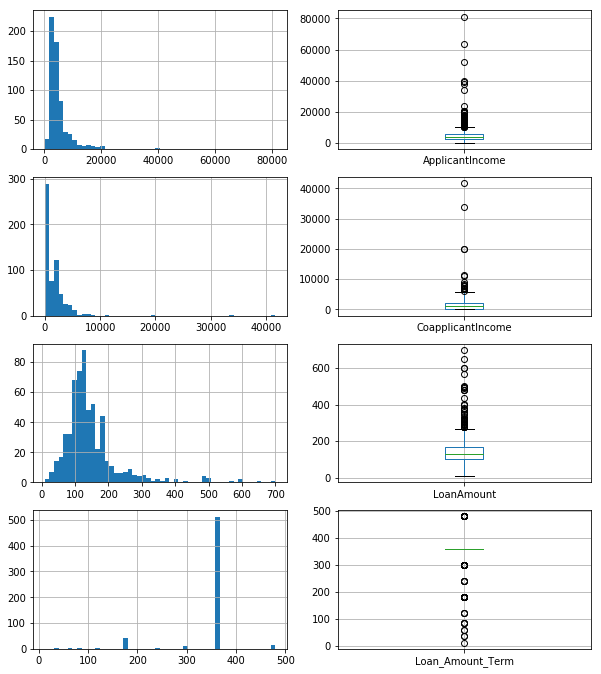

In [9]:
fig1 = plt.figure(figsize=(10,24))
ax1 = fig1.add_subplot(8,2,1)
df_train['ApplicantIncome'].hist(bins=50)
ax2 = fig1.add_subplot(8,2,2)
df_train.boxplot(column='ApplicantIncome')
ax3 = fig1.add_subplot(8,2,3)
df_train['CoapplicantIncome'].hist(bins=50)
ax4 = fig1.add_subplot(8,2,4)
df_train.boxplot(column='CoapplicantIncome')
ax5 = fig1.add_subplot(8,2,5)
df_train['LoanAmount'].hist(bins=50)
ax6 = fig1.add_subplot(8,2,6)
df_train.boxplot(column='LoanAmount')
ax7 = fig1.add_subplot(8,2,7)
df_train['Loan_Amount_Term'].hist(bins=50)
ax8 = fig1.add_subplot(8,2,8)
df_train.boxplot(column='Loan_Amount_Term')

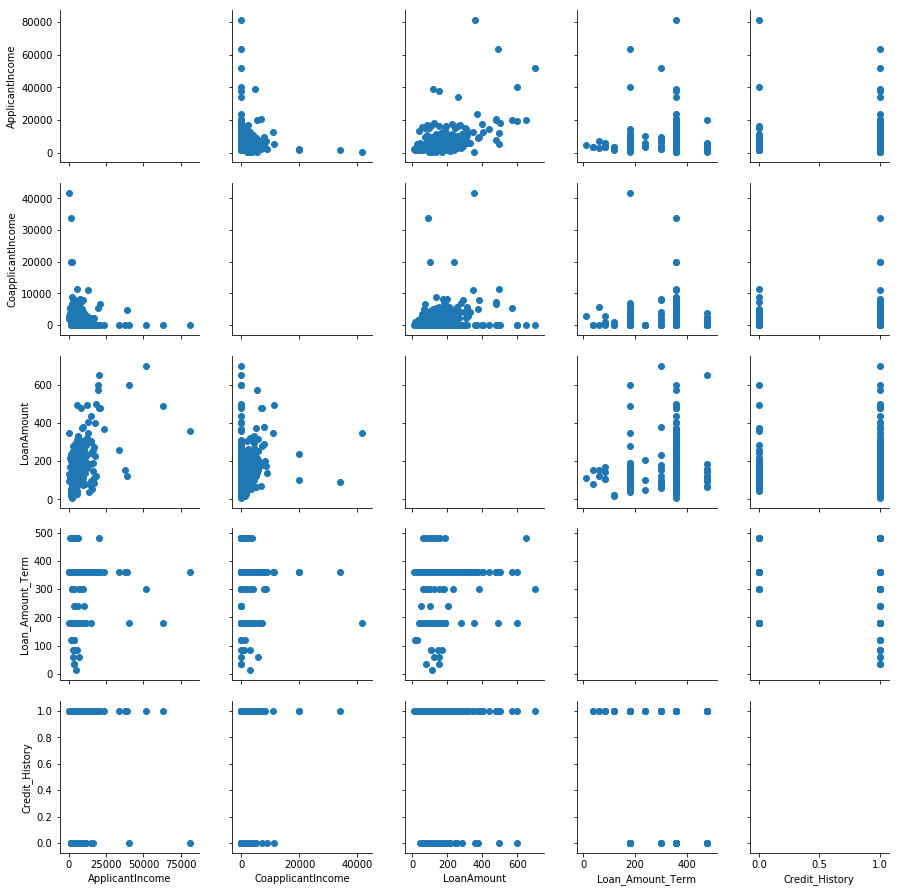

In [10]:
g = sns.PairGrid(df_train)
# g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


### 2.1.4. Categorical variable analysis: 

Gender,	Married, Dependents, Education, Self_Employed, Credit_History, Property_Area

Text(0.5,1,'Property_Area')

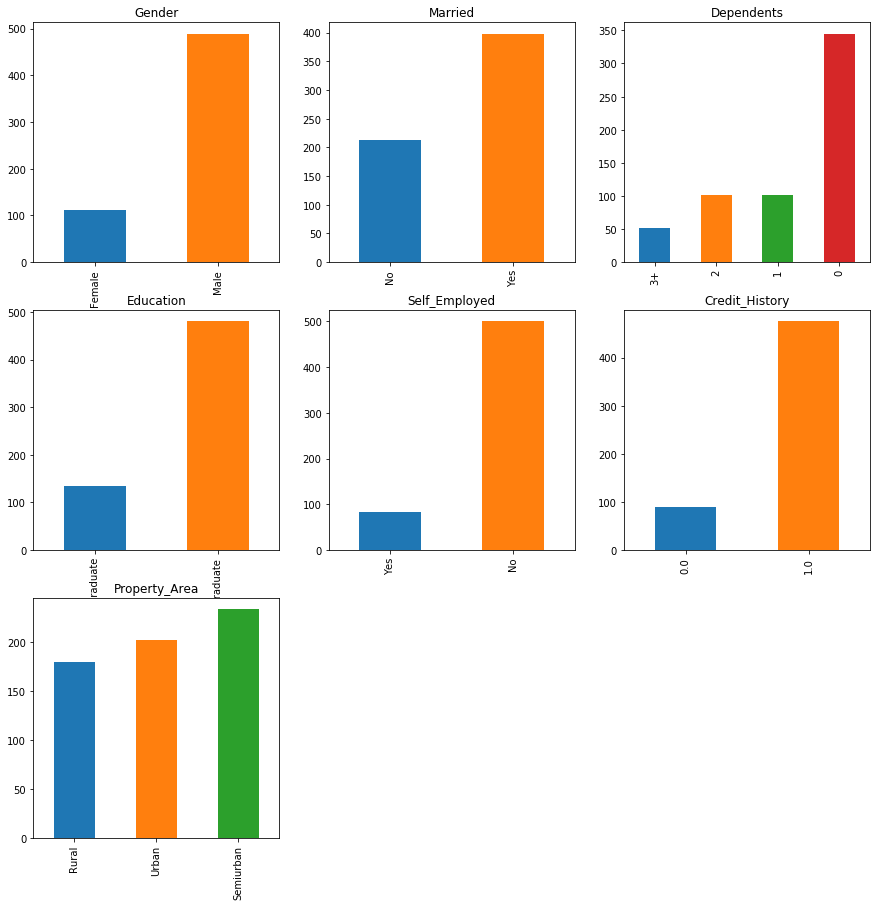

In [11]:
fig2 = plt.figure(figsize=(15,15))

ax1 = fig2.add_subplot(3,3,1)
gender_temp = df_train['Gender'].value_counts(ascending=True)
gender_temp.plot(kind='bar')
ax1.set_title("Gender")

ax2 = fig2.add_subplot(3,3,2)
married_temp = df_train['Married'].value_counts(ascending=True)
married_temp.plot(kind='bar')
ax2.set_title("Married")

ax3 = fig2.add_subplot(3,3,3)
dependents_temp = df_train['Dependents'].value_counts(ascending=True)
dependents_temp.plot(kind='bar')
ax3.set_title("Dependents")

ax4 = fig2.add_subplot(3,3,4)
education_temp = df_train['Education'].value_counts(ascending=True)
education_temp.plot(kind='bar')
ax4.set_title("Education")

ax5 = fig2.add_subplot(3,3,5)
self_employed_temp = df_train['Self_Employed'].value_counts(ascending=True)
self_employed_temp.plot(kind='bar')
ax5.set_title("Self_Employed")

ax6 = fig2.add_subplot(3,3,6)
credit_history_temp = df_train['Credit_History'].value_counts(ascending=True)
credit_history_temp.plot(kind='bar')
ax6.set_title("Credit_History")

ax7 = fig2.add_subplot(3,3,7)
property_area_temp = df_train['Property_Area'].value_counts(ascending=True)
property_area_temp.plot(kind='bar')
ax7.set_title("Property_Area")

In [12]:
temp1 = df_train['Credit_History'].value_counts(ascending=True)
temp2 = df_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print ('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


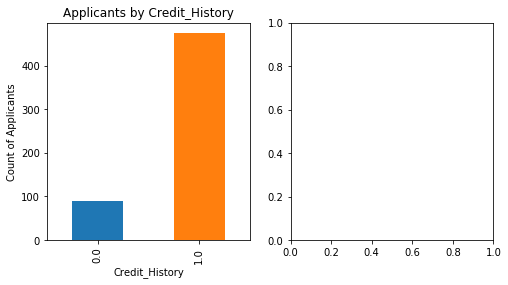

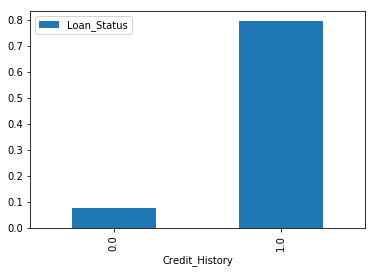

In [13]:
fig3 = plt.figure(figsize=(8,4))
ax1 = fig3.add_subplot(1,2,1)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


ax2 = fig3.add_subplot(1,2,2)
temp2.plot(kind = 'bar')
#ax2.set_xlabel('Credit_History')
#ax2.set_ylabel('Probability of getting loan')
#ax2.set_title("Probability of getting loan by credit history")


## 2.2 Data Processing

### 2.2.1. Make features space


In [14]:
# set path of project
default_path = os.getcwd()
print (default_path) # Prints the working directory
path = "D:/Python-projects/LoanPrediction3"
os.chdir(path)
print(path)

'''
Clear source datasets, construct new variables, drop correlated features 
and save final datasets as train_ready.csv and test_ready.csv in folder /data/interim
'''

from src.data.make_dataset import make_data
input_filepath, output_filepath = r"data/raw/", r"data/interim/"
make_data(input_filepath, output_filepath)
display("Ready")







D:\Python-projects\LoanPrediction3
D:/Python-projects/LoanPrediction3
Sizes (614, 12) (367, 11)
Outcome dispersion:
 Y    422
N    192
Name: Loan_Status, dtype: int64
(981, 11)
Start  make_features
Start  make_null_features
Finish  make_null_features
Start  make_calc_features
Finish  make_calc_features
Start  make_logs
Finish  make_logs
Start  make_str_features
Finish  make_str_features
Start 

 drop_correlated_features
Columns were droped:  ['LOG_DTI', 'LOG_DTI_person', 'LOG_DTI_month', 'LOG_DTI_month_person', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes']
Finish  drop_correlated_features
Finish  make_features
(614, 39) (367, 39)


'Ready'

# 3. Building a Predictive Models

## 3.1.Spot Check Algorithms

In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import src.models.eval_model as ev
from src.features.select_features import select_features_rfe
from sklearn.ensemble import RandomForestClassifier

seed = 1234567
data_tmp = pd.read_csv('data/interim/train_ready.csv', index_col=0)

trainSet, testSet, y_train, y_test = ev.get_features_and_labels(data_tmp, seed=seed)
sfs1 = SFS(RandomForestClassifier(n_estimators=100, random_state=seed), 
           scoring='roc_auc', verbose=2, k_features=16, forward=False, n_jobs=-1)
sfs1.fit(trainSet, y_train)

print('\nSelected features by SFS:', data_tmp.columns[list(sfs1.k_feature_idx_)])

D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    8.5s finished

[2018-04-19 15:37:17] Features: 37/16 -- score: 0.787735492578

[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    8.2s finished

[2018-04-19 15:37:26] Features: 36/16 -- score: 0.793470985155

[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    7.8s finished

[2018-04-19 15:37:34] Features: 35/16 -- score: 0.795819163293

[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    7.6s finished

[2018-04-19 15:37:42] Features: 34/16 -- score: 0.790032388664

[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    7.7s finished

[2018-04-19 15:37:50] Features: 33/16 -- score: 0.800520917679

[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    7.6s finished

[2018-04-19 15:37:58] Features: 32/16 -- score: 0.800717948718

[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    8.2s finished

[2018-04-19 15:38:06] Features: 31/16 -- score: 0.796639676113

[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    8.4s finished

[2018-04-19 15:38:15] Features: 30/16 -- score: 0.800383265857

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.2s finished

[2018-04-19 15:38:24] Features: 29/16 -- score: 0.797522267206

[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    8.0s finished

[2018-04-19 15:38:32] Features: 28/16 -- score: 0.794582995951

[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    8.1s finished

[2018-04-19 15:38:40] Features: 27/16 -- score: 0.793044534413

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    7.4s finished

[2018-04-19 15:38:48] Features: 26/16 -- score: 0.794871794872

[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    7.3s finished

[2018-04-19 15:38:56] Features: 25/16 -- score: 0.797039136302

[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    6.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.9s finished



[2018-04-19 15:39:03] Features: 24/16 -- score: 0.796696356275

[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    6.7s remaining:    0.5s


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    7.1s finished

[2018-04-19 15:39:10] Features: 23/16 -- score: 0.790777327935

[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    6.3s remaining:    0.9s


[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    6.9s finished

[2018-04-19 15:39:18] Features: 22/16 -- score: 0.798871794872

[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    6.5s remaining:    0.9s


[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    6.8s finished

[2018-04-19 15:39:25] Features: 21/16 -- score: 0.793101214575

[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    6.0s remaining:    1.3s


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    6.2s finished

[2018-04-19 15:39:31] Features: 20/16 -- score: 0.801524966262

[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    5.9s remaining:    1.4s


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.2s finished

[2018-04-19 15:39:38] Features: 19/16 -- score: 0.804593792173

[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    5.4s remaining:    1.9s


[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    6.1s finished

[2018-04-19 15:39:44] Features: 18/16 -- score: 0.80155465587

[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    5.0s remaining:    1.9s


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    5.9s finished

[2018-04-19 15:39:51] Features: 17/16 -- score: 0.804032388664

[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    4.9s remaining:    2.6s



Selected features by SFS: Index(['CoapplicantIncome', 'Credit_History', 'TotalIncome',
       'TotalIncomePerson', 'LoanAmountMonth', 'DTI_month',
       'LOG_Loan_Amount_Term', 'LOG_DTI_month', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Dependents_1', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_Yes'],
      dtype='object')


[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    6.1s finished

[2018-04-19 15:39:57] Features: 16/16 -- score: 0.799684210526

D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(614, 17)
Evaluating classifiers
LDA: ROC_AUC on CV 0.743884 (0.121505) ; ROC_AUC on testSet: 0.727549 


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarn

KNN: ROC_AUC on CV 0.710065 (0.124093) ; ROC_AUC on testSet: 0.705928 


CART: ROC_AUC on CV 0.698566 (0.084490) ; ROC_AUC on testSet: 0.658759 
NB: ROC_AUC on CV 0.774869 (0.123891) ; ROC_AUC on testSet: 0.706204 
LR: ROC_AUC on CV 0.744179 (0.116821) ; ROC_AUC on testSet: 0.723900 


RF: ROC_AUC on CV 0.772117 (0.097567) ; ROC_AUC on testSet: 0.681763 


XGB: ROC_AUC on CV 0.744033 (0.120587) ; ROC_AUC on testSet: 0.728379 


LGB: ROC_AUC on CV 0.787325 (0.106878) ; ROC_AUC on testSet: 0.718259 
Plotting the results


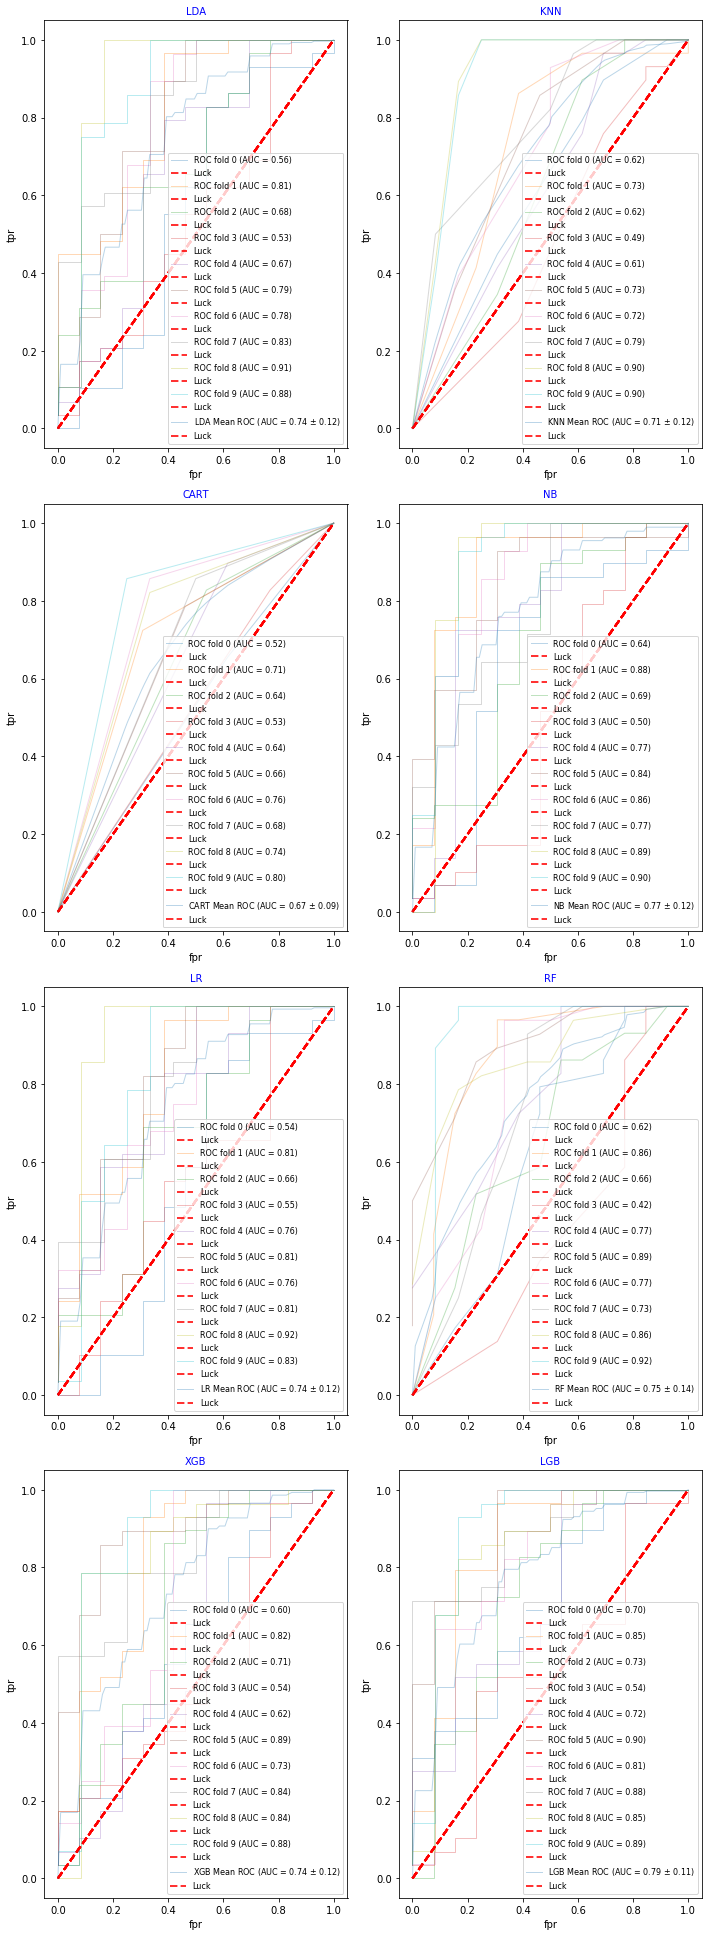

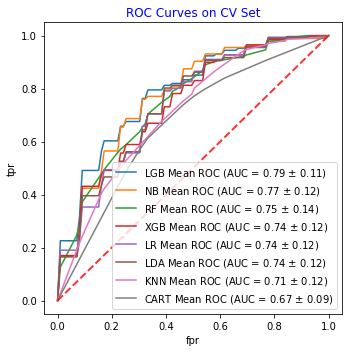

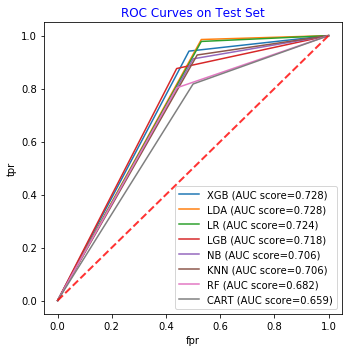

In [15]:
#features_idx = list(select_features_rfe(data_tmp, RandomForestClassifier(n_estimators=100, random_state=seed),
#                                        seed=seed, n_features=20))
y = data_tmp['y']
data_short = data_tmp.iloc[:, list(sfs1.k_feature_idx_)]
data_short['y'] = y
print(data_short.shape)
trainSet, testSet, y_train, y_test = ev.get_features_and_labels(data_short, seed=seed)

# Evaluate multiple classifiers on the data
print("Evaluating classifiers")
details_cv, results_cv, results_test = list(ev.eval_classifiers(trainSet, testSet, y_train, y_test, seed=seed))

# indexing results
import operator
results_cv.sort(key=operator.itemgetter(3), reverse=True)
results_test.sort(key=operator.itemgetter(3), reverse=True)
# Display the results
print("Plotting the results")

fig, axis = plt.subplots(nrows=round(len(details_cv)/2), ncols=2, figsize=(10, 27))
axis = axis.flatten()
i = 0
for detail_cv in details_cv:
    for label, fpr, tpr, _ in detail_cv:
        axis[i].plot(fpr, tpr,  lw=1, alpha=0.3, label=label)
        axis[i].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                     label='Luck', alpha=.8)
        axis[i].set
        axis[i].set_xlabel('fpr', fontsize=10)
        axis[i].set_ylabel('tpr', fontsize=10)
        axis[i].set_title(label[:label.find(' ')],  fontsize=10, color="blue")
        axis[i].legend(loc='lower right', fontsize=8)

    i += 1


# Let matplotlib improve the layout

fig.tight_layout()
plt.show()
ev.plot('ROC Curves on CV Set', results_cv)
ev.plot('ROC Curves on Test Set', results_test)


# 4. Improve results
## 4.1. Algorithm Tuning
### 4.1.1 Search the space of model parameters

I select for tuning 3 algoritms: logistic regression, xgb and lgb


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()             # initialize the model
C_range =np.arange(0.005, 0.021, 0.001)
print(C_range)
param_grid = {'C': C_range}
print("Сетка параметров:\n{}".format(param_grid)) 

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', return_train_score=True )
grid_search.fit(trainSet, y_train)


print("Правильность на тестовом наборе: {:.3f}".format(grid_search.score(testSet, y_test))) 
best_params = grid_search.best_params_
print(best_params)





[ 0.005  0.006  0.007  0.008  0.009  0.01   0.011  0.012  0.013  0.014
  0.015  0.016  0.017  0.018  0.019  0.02 ]
Сетка параметров:
{'C': array([ 0.005,  0.006,  0.007,  0.008,  0.009,  0.01 ,  0.011,  0.012,
        0.013,  0.014,  0.015,  0.016,  0.017,  0.018,  0.019,  0.02 ])}


Правильность на тестовом наборе: 0.796
{'C': 0.016}


In [17]:
clf_best = LogisticRegression(C=best_params['C'])
clf_best.fit(trainSet, y_train)

from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test,  clf_best.predict(testSet))
confusion.
print(pd.Series(y_test).value_counts(ascending=True))
print("Confusion matrix:\n{}".format(confusion)) 

print("Правильность на тестовом наборе: {:.3f}".format(clf_best.score(testSet, y_test)))


0.0     66
1.0    137
dtype: int64
Confusion matrix:
[[ 31  35]
 [  7 130]]
Правильность на тестовом наборе: 0.793


In [31]:
#Make logistic regression - based submission

lr_production = LogisticRegression(C=best_params['C'])
train_full = np.concatenate((trainSet, testSet), axis=0)
Y_train = np.concatenate((y_train, y_test), axis=0)
lr_production.fit(train_full, Y_train)

# get_id for test
df_test = pd.read_csv('data/raw/test_Y3wMUE5_7gLdaTN.csv')
id = df_test.Loan_ID


# Read test_ready set
data_test = pd.read_csv('data/interim/test_ready.csv')
test_array = np.array(data_test.iloc[:, list(sfs1.k_feature_idx_)])

Y_pred = lr_production.predict(test_array)
#print(Y_pred, Y_pred.shape)
#print(Y_pred.astype(int))


lr_submission = pd.read_csv('data/interim/test_ready.csv')
lr_submission.insert(1, 'Loan_Status', Y_pred)
lr_submission['Loan_Status'] = lr_submission['Loan_Status'].map({0: "N", 1: "Y"})
lr_submission['Loan_ID'].astype(str)
lr_submission['Loan_Status'].astype(str)
lr_submission.to_csv('data/processed/lr_submission.csv', sep=',', index=False)